### EG/2018/3432  RANASINGHE K.K.P.M

In [64]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data

#### 1. To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

In [65]:
def reduce_intensity_levels(image, levels):
    # Determine the step size for each intensity level
    print("Image shape:", image.shape )
    print("Image dataType:", type(image))
     # intensity level as a integer power of 2
    steps = pow(2,levels)-1  
    step = 255/ steps
    # change the image to the new intensity levels
    reduced_image = np.round(image/step)*step
    
    return reduced_image


Image shape: (512, 512)
Image dataType: <class 'numpy.ndarray'>


<Figure size 640x480 with 0 Axes>

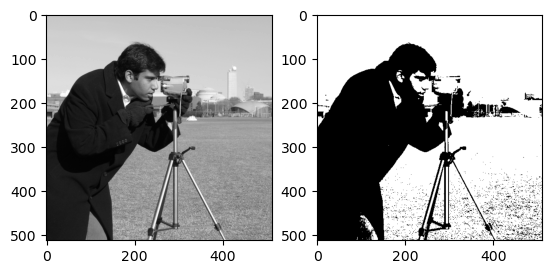

In [66]:
image = data.camera()
levels = int(input("Enter the desired number of intensity levels as a integer power of 2: ")) # according to the question input should be 1
plt.gray()
f,arr = plt.subplots(1,2)
reduced = reduce_intensity_levels(image, levels) 
arr[0].imshow(image)
arr[1].imshow(reduced)


### 2. Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood.


Text(0.5, 1.0, '20*20 kernel')

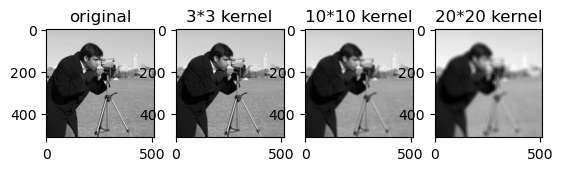

In [67]:
image = data.camera()

f,arr = plt.subplots(1,4)
plt.gray()
image3k = cv2.blur(image,(3,3))     # spartial 3*3 average of image pixels
image10k = cv2.blur(image,(10,10))  # spartial 10*10 average of image pixels
image20k = cv2.blur(image,(20,20))  # spartial 20*20 average of image pixels

arr[0].imshow(image)
arr[0].set_title('original')

arr[1].imshow(image3k)
arr[1].set_title('3*3 kernel')

arr[2].imshow(image10k)
arr[2].set_title('10*10 kernel')

arr[3].imshow(image20k)
arr[3].set_title('20*20 kernel')

### 3. Rotate an image by 45 and 90 degrees.

In [68]:
def rotateImage(image, angle):
    # Get the image shape
    height, width = image.shape[:2]
    # Get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    # Apply the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

Text(0.5, 1.0, '90 deg rotation')

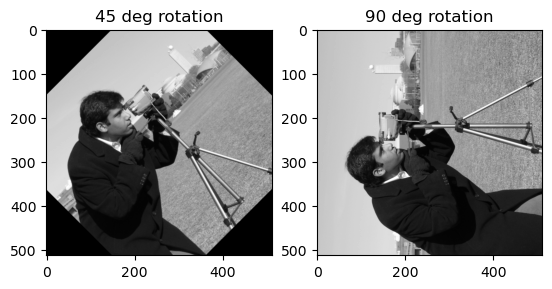

In [69]:
image = data.camera()

dst_45 = rotateImage(image, 45)
dst_90 = rotateImage(image, 90)

fig, axarry = plt.subplots(1, 2)
axarry[0].imshow(dst_45)
axarry[0].set_title('45 deg rotation') 

axarry[1].imshow(dst_90)
axarry[1].set_title('90 deg rotation')

### 4. For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.

In [70]:
import cv2

def reduce_image_spatial_resolution(img, factor):
    
    # Create a new empty image with shape (height/factor, width/factor)
    downsampled_img = np.zeros((img.shape[0]//factor, img.shape[1]//factor), dtype=np.uint8)

    # Define the block size
    block_size = (factor,factor )

    for y in range(0, img.shape[0]-block_size[0]+1, block_size[0]):
        for x in range(0, img.shape[1]-block_size[1]+1, block_size[1]):
            block = img[y:y+block_size[0], x:x+block_size[1]]
        
            # Calculate the average of all the pixels in the block
            avg = block.mean(axis=(0, 1))
        
            # Assign the average value to the corresponding position in the new image
            downsampled_img[y//factor][x//factor] = avg

    return downsampled_img

Text(0.5, 1.0, '7*7 ')

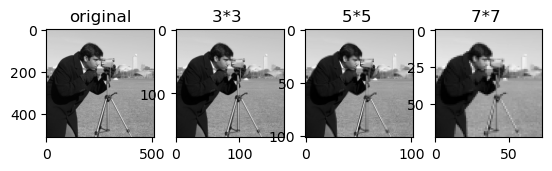

In [81]:
image = data.camera()

image3k = reduce_image_spatial_resolution(image, 3)
image5k = reduce_image_spatial_resolution(image, 5)
image7k = reduce_image_spatial_resolution(image, 7)


fig, arr = plt.subplots(1, 4)


arr[0].imshow(image)
arr[0].set_title('original')

arr[1].imshow(image3k)
arr[1].set_title('3*3 ')

arr[2].imshow(image5k)
arr[2].set_title('5*5 ')

arr[3].imshow(image7k)
arr[3].set_title('7*7 ')
